# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

Text(0,0.5,'count')

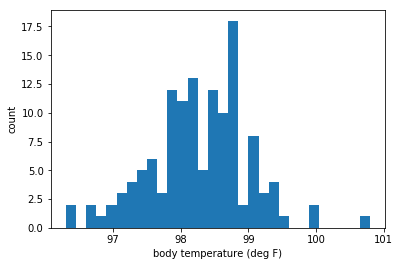

In [2]:
# 1. We first plot the data as a histogram to assess the normality of the distribution
_ = plt.hist(df['temperature'], bins= 30)
plt.xlabel('body temperature (deg F)')
plt.ylabel('count')
# Testing different bin sizes the data cannot be confidently asserted to be symetric or normaly distributed as it has many 
# outliers in the upper range of temperatures and possible squew

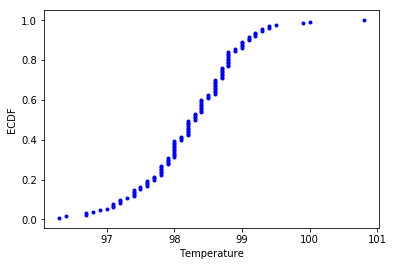

In [3]:
# To avoid the binning issue we can display the data as an ECDF, which we will compare
# Number of data points: n
n = len(df['temperature'])

# x-data for the ECDF: x, sorted temperature values
x_temp = np.sort(df['temperature'])

# y-data for the ECDF: y between 0 and 1
y_temp = np.arange(1, n+1) / n

# Generate plot
plt.plot(x_temp, y_temp, marker= '.', linestyle = 'none', color= 'b')

# Label the axes
plt.xlabel('Temperature')
plt.ylabel('ECDF')

# Display the plot
plt.show()

# The ECDF seems roughly normal with a few extreme outliers, but we will use a few numerical tests to check with more certainty

In [4]:
# We can perform multiple statistical tests to find if the  human temperature distribution can be rejected as a normal
# distribution in a function that counts the results of the tests
def normality_tester(data):
    """Runs normality tests on data and prints the results"""
    # we initialize the results counters
    null_fail_reject_counter = 0
    null_reject_counter = 0
    test_fail_reject_name = []
    test_reject_name = []
    # we will employ the Shapiro-Wilk test, using the standard alpha value of 0.05 as we want to avoid either type 1 and 2 errors
    stat, p = stats.shapiro(data)
    # Interpretation, null hypothesis is that the distribution came from a normally distributed population
    alpha = 0.05
    if p > 0.05:
        null_fail_reject_counter += 1
        test_fail_reject_name.append('Shapiro-Wilk')
    else:
        null_reject_counter += 1
        test_freject_name.append('Shapiro-Wilk')
    # We will also perfor a D'Agostino's K^2 test to find skew or kurtosis that could be enough to reject the null hypothesis
    stat, p = stats.normaltest(data)
    # Interpretation, same alpha
    if p > 0.05:
        null_fail_reject_counter += 1
        test_fail_reject_name.append('K^2')
    else:
        null_reject_counter += 1
        test_freject_name.append('K^2')
    # Just in case we could find any discrepancy we will employ another test the Anderson-Darling which we can employ 
    # in our case if the distribution could come from a normal distribution
    result = stats.anderson(data)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            null_fail_reject_counter += 1
            test_fail_reject_name.append('Anderson-Darling')
        else:
            null_reject_counter += 1
            test_reject_name.append('Anderson-Darling')
    # We remove duplicates from lists
    test_reject_name = list(dict.fromkeys(test_reject_name))
    test_fail_reject_name = list(dict.fromkeys(test_fail_reject_name))
    
    if null_fail_reject_counter == 0:
        print('Distribution most likely not normal, all tests failed')
        print('Tests failed:')
        print(test_reject_name)
    if null_reject_counter == 0:
        print('Distribution most likely normal, all tests succeded')
        print('Tests succeeded:')
        print(test_fail_reject_name)
    elif null_fail_reject_counter > null_reject_counter:
        print('Distribution probably normal, some tests failed')
        print('Tests succeeded:')
        print(test_fail_reject_name)
        print('Tests failed:')
        print(test_reject_name)
    elif null_reject_counter > null_fail_reject_counter:
        print('Distribution probably not normal, most tests failed')
        print('Tests succeeded:')
        print(test_fail_reject_name)
        print('Tests failed:')
        print(test_reject_name)
    elif null_fail_reject_counter == null_reject_counter:
        print('Results inconclussive, as many tests failed as succeeded')
        print('Tests succeeded:')
        print(test_fail_reject_name)
        print('Tests failed:')
        print(test_reject_name)
    print('Total tests where null hypothesis was failed to be rejected = %.3f' % null_fail_reject_counter)
    print('Total tests where null hypothesis was rejected = %.3f' % null_reject_counter)
normality_tester(df['temperature'])

Distribution most likely normal, all tests succeded
Tests succeeded:
['Shapiro-Wilk', 'K^2', 'Anderson-Darling']
Total tests where null hypothesis was failed to be rejected = 7.000
Total tests where null hypothesis was rejected = 0.000


In [5]:
# 2 according to the central limit theorem the sampling distribution of a sample means would approach a normal distribution
# above 30 samples, we will look at the description of the sample
df.describe()
# As observed the sample has more than 30 elements at 130 thus the sample is large enough.
# An appraisal of the study found in https://med.stanford.edu/content/dam/sm/epidemiology/documents/HRP236/Parsonnet---Critical-Appraisal-of-98.6F.pdf
# States that the original study was made on 25000 individuals, thus the sample follows the 10% rule for sampling without
# replacement, for the measurements to be considered independent.

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [6]:
# 3
# Before we start our hypothesis testing we should set the significance level α which we will use as the benchmark at which we
# should reject the null Hypothesis H0 if equal or bellow or fail to reject if above on our p value.

# The significance level is usually set at 0.05 which me can change in order to avoid Type I errors (false positives) which we
# reduce by lowering α, and to avoid Type II errors (false negatives) which we reduce by increasing α.

# We use boostrap samples to run a bootstrap hypothesis test as in the example below by making a random choice with replacement
# of our target sample data to produce a sample of the same length.
bs_sample_temp = np.random.choice(df['temperature'], size = len(df['temperature']))
# We create a function to find bootstrap sample replicates with our target function as illustrated in https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/bootstrap-confidence-intervals?ex=6
def draw_bs_replicates(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates
# The null hypothesis is that the real mean body temperature is 98.6 degrees F and the alternative hypothesis is that it's 
# different, but we do not have the original population data thus to perform the bootstrap hypothesis test we translate our
# sample distribution to have that mean
translated_distribution = df['temperature'] - np.mean(df['temperature']) + 98.6
# We thus have a distribution that has the target mean but the same standard deviation and number of elements of the original
# sample.
# We now take boostrap replicates of the mean of the translated sample
bootstrap_rep = draw_bs_replicates(translated_distribution, np.mean, size=10000)
# We now calculate the p value, as the mean of the sample is below we will calculate p for temperatures below the mean of the 
# sample 
p = np.sum(bootstrap_rep <= np.mean(df['temperature'])) / 10000

# Print the p-value
print('p = ', p)
# The P value with the simulated population comes out as 0 meaning it is extremely unlikely for the sample to come from that
# population thus with the bootstrap test we reject the null hypothesis that the true population mean is 98.6

p =  0.0


In [7]:
# We will use a one-sample test for this particular question as we are not comparing different groups in our sample but
# comparing our entire sample to the null hypothesis.

# as the sample size is greater than 30 we can estimate the z value with
z = (np.mean(df['temperature']) - 98.6) * np.sqrt(130/np.var(df['temperature']))
p = stats.norm.cdf(z)
print('The p value using the z statistic is', p)

The p value using the z statistic is 2.17615758294e-08


In [8]:
# To calculate the one-sample t statistic we first proceed as before with the z statistic
t = (np.mean(df['temperature']) - 98.6) * np.sqrt(130/np.var(df['temperature']))
# But now we compute the degrees of freedom we will need to compute the p value
deg_f = len(df['temperature']) - 1
p = stats.t.cdf(t,df=deg_f)
print('The p value using the t statistic is', p)

The p value using the t statistic is 1.0943732312e-07


In [9]:
# 4 we draw a small sample of 10 using the bootstrapping method and we calculate the z value as before
z = (np.mean(np.random.choice(df['temperature'], size = 10)) - 98.6) * np.sqrt(10/np.var(df['temperature']))
p = stats.norm.cdf(z)
print('The p value using the z statistic on a sample size 10 is', p)

The p value using the z statistic on a sample size 10 is 0.00766118576662


In [10]:
deg_f = 9
bs_sample = np.random.choice(df['temperature'], size = 10)
t = (np.mean(bs_sample) - 98.6) * np.sqrt(10/np.var(bs_sample))
# But now we compute the degrees of freedom we will need to compute the p value
p = stats.t.cdf(t,df=deg_f)
print('The p value using the t statistic on a sample size 10 is', p)
# with a sample as small as 10 wether done with or without replacement the resulting p value is very variable depending on the
# resulting sample chosen, the central limit theorem still applies for t statistics as it does for z statistics

The p value using the t statistic on a sample size 10 is 0.215246042908


Text(0.5,0,'sample size')

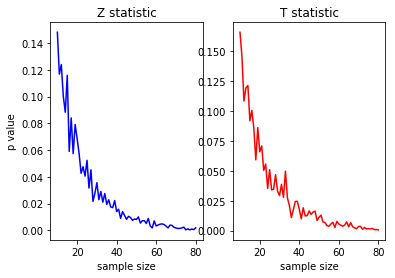

In [11]:
# To better see how much the result is affected by the small sample size for each, we will plot the average p value from 100
# z and t statistics from 10 to 40 sample size to see how much the central limit theorem applies for both statistics
sample_size = 10
# Empty lists created for p value means
p_z_mean = []
p_t_mean = []
while sample_size < 81:
    # Empty lists for p value samples
    p_z_list = []
    p_t_list = []
    for i in range(100):
        # We calculate the p values with the z and t statistics as before and we append them to the lists
        z = (np.mean(np.random.choice(df['temperature'], size = sample_size)) - 98.6) * np.sqrt(sample_size/np.var(df['temperature']))
        p_z = stats.norm.cdf(z)
        p_z_list.append(p_z)
        bs_sample = np.random.choice(df['temperature'], size = sample_size)
        t = (np.mean(bs_sample) - 98.6) * np.sqrt(sample_size/np.var(bs_sample))
        p_t = stats.t.cdf(t,df=(sample_size - 1))
        p_t_list.append(p_t)
    # We calculate the mean of p values for each sample size and append them
    p_z_mean.append(np.mean(p_z_list))
    p_t_mean.append(np.mean(p_t_list))
    sample_size = sample_size + 1

# We create the subplots
plt.subplot(1, 2, 1)
plt.plot(range(10,81), p_z_mean, color='blue')
plt.title('Z statistic')
plt.xlabel('sample size')
plt.ylabel('p value')
plt.subplot(1, 2, 2)
plt.plot(range(10,81), p_t_mean, color='red')
plt.title('T statistic')
plt.xlabel('sample size')
# We see that both statistics start to flatline at a sample of about 30, the advantage of the t statistics over the z statistic
# is that we don't need to know the population standard deviation or an approximation of it from a much larger sample to estimate
# it, thus it would be better in case we didn't know the standard deviation of the sample of 130 people.
# As we can see in the graphs, the central limit theorem is not perfect bust serves as a good rule of thumb in the same way as
# choosing a p value of 0.5 as a standard, as we see on this case choosing an α of 0.01 would have caused what would likely be
# Type II errors

In [12]:
# 5 To find which temperature would be considered abnormal we will simulate a sampling distribution of the sample mean by using
# the bootstrapping method as previously by creating what is called bootstrap repplicates
# We create the function for bootstrap repplicates as it was shown in https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/bootstrap-confidence-intervals?ex=6
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates
# We draw 10000 replicates of the sample
bs_replicates = draw_bs_reps(df['temperature'], np.mean, size=10000)

In [13]:
# We can compute a 95% confidence interval simply by calculating the 2.5 to 97.5 percentiles of the replicates
conf_int_95 = np.percentile(bs_replicates, [2.5, 97.5])
print('The resulting 95% confidence interval using the bootstrap method is', conf_int_95, 'with a margin of error of +-', (conf_int_95[1] - conf_int_95[0])/2)
# As we can see, the margin of error is very small in this simulated population, slightly above 0.1 degrees F, also as we can see
# from the description of the sample in exercise 2 over 50% of all the members are outside the 95% confidence interval, which could
# be because the sample data has many outliers or the real population distribution is bimodal we will test this in the next exercise 
# allong gender lines

The resulting 95% confidence interval using the bootstrap method is [ 98.12153846  98.37538462] with a margin of error of +- 0.126923076923


In [14]:
# Using the z statistic method we calculate the margin of error and 95% confidence interval
# We don't have the population standard deviation but since the sample is way larger than 30 we can use the sample error
# to calculate the standard error
s_err = np.std(df['temperature'])/np.sqrt(len(df['temperature']))
# We calculate the z critical value for 95% confidence interval
z = stats.norm.ppf(0.975)
# We calculate the margin of error which is the critical value by the standard error
m_err = z * s_err
# With the margin of error we calculate the confidence interval
c_int = [np.mean(df['temperature']) - m_err, np.mean(df['temperature']) + m_err]
print('The resulting 95% confidence interval using the c statistic is', c_int, 'with a margin of error of +-', m_err)

The resulting 95% confidence interval using the c statistic is [98.123682111456645, 98.37477942700491] with a margin of error of +- 0.125548657774


In [15]:
# We calculate the t critical value for 95% confidence interval with in this case 129 degrees of freedom
t = stats.t.ppf(0.975, df=(len(df['temperature'])-1))
# We calculate the margin of error which is the critical value by the standard error
m_err_t = t * s_err
# With the margin of error we calculate the confidence interval
c_int_t = [np.mean(df['temperature']) - m_err_t, np.mean(df['temperature']) + m_err_t]
print('The resulting 95% confidence interval using the t statistic is', c_int_t, 'with a margin of error of +-', m_err_t)
# We see that using the t statistic the margin of error is closer to the bootstrap method than using the z statistic 

The resulting 95% confidence interval using the t statistic is [98.12249318821641, 98.375968350245145] with a margin of error of +- 0.126737581014


In [16]:
# 6 Is there a significant difference between males and females in normal temperature?
# To solve this problem we will use a two sample bootstrap approach which benefits from downplaying the influence of extreme
# outliers in the study
female_sample = df[df['gender'] == 'F']
male_sample = df[df['gender'] == 'M']
mean_temp = np.mean(df['temperature'])
# We create the translated samples to have the same mean as the total population
translated_female = female_sample['temperature'] - np.mean(female_sample['temperature']) + mean_temp
translated_male = male_sample['temperature'] - np.mean(male_sample['temperature']) + mean_temp
# We take bootstrap replicates of the translated samples
bootstrap_trans_female = draw_bs_replicates(translated_female, np.mean, size=10000)
bootstrap_trans_male = draw_bs_replicates(translated_male, np.mean, size=10000)
# We perform the comparisons
bootstrap_rep_trans = np.absolute(bootstrap_trans_female - bootstrap_trans_male)
# We take the boostrap replicates of the empirical values and perform the comparisons
bootstrap_emp_female = draw_bs_replicates(female_sample['temperature'], np.mean, size=10000)
bootstrap_emp_male = draw_bs_replicates(male_sample['temperature'], np.mean, size=10000)
bootstrap_rep_emp = np.absolute(bootstrap_emp_female - bootstrap_emp_male)
# We perform the significance test
p = np.sum(bootstrap_rep_trans >= bootstrap_rep_emp) / 10000
print('The p value using the bootstrap method is', p, 'thus the null hypothesis is failed to be rejected')

The p value using the bootstrap method is 0.1009 thus the null hypothesis is failed to be rejected


In [17]:
male_sample_temp = male_sample['temperature']
female_sample_tempt = female_sample['temperature']
# We also perform a Cohen's d test to check if the difference in body temperature between males and females is significant enough
# we perform the Cohen's d test on the two samples for which we have to first calculate the pooled standard deviation
poolstd = np.sqrt(((len(male_sample_temp)-1)*np.var(male_sample_temp)+(len(female_sample_tempt)-1)*np.var(female_sample_tempt))/(len(male_sample_temp)+len(female_sample_tempt)-1))
# we now calculate the Cohen's d test
cohend = np.absolute((np.mean(male_sample_temp)-np.mean(female_sample_tempt))/poolstd)
print('The Cohen d test result is', cohend, 'which is above 0.4 meaning the difference has a small significance.')

The Cohen d test result is 0.405586664768 which is above 0.4 meaning the difference has a small significance.


In [18]:
# We could conclude that the statistical test fails to reject the null hypothesis that there is a significant difference between
# males and females in body temperature statisticaly.
# The Cohen's d test shows that there is a difference of small significance in body temperature between males and females in a
# practical sense, with the caveat that the study includes 130 individuals which although large enough for the CLT it would
# still benefit from an expansion in the study sample
# This difference in body temperature could explain some of the oddities we encountered earlier